In [13]:
import pandas as pd #reading in csv
import seaborn as sns #vis
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import json


# Info
y: accidents_2017.csv
air_qualityNov2017.csv
immigrantsbynation
population
unemployment

other sources?
weather, alcohol consumption

Min: ~5000

Preidct BY HOUR whether or not accidents will be greater than normal or less than normal 

In [3]:
acc = pd.read_csv('barcelona-data-sets/accidents_2017.csv')


In [4]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [5]:
acc['District Name']

0            Unknown
1            Unknown
2            Unknown
3            Unknown
4         Sant Martí
5         Sant Martí
6         Sant Martí
7         Sant Martí
8         Sant Martí
9         Sant Martí
10        Sant Martí
11        Sant Martí
12        Sant Martí
13        Sant Martí
14        Sant Martí
15        Sant Martí
16        Sant Martí
17        Sant Martí
18        Sant Martí
19        Sant Martí
20        Sant Martí
21        Sant Martí
22        Sant Martí
23        Sant Martí
24        Sant Martí
25        Sant Martí
26        Sant Martí
27        Sant Martí
28        Sant Martí
29        Sant Martí
            ...     
10309    Sant Andreu
10310    Sant Andreu
10311    Sant Andreu
10312    Sant Andreu
10313    Sant Andreu
10314    Sant Andreu
10315    Sant Andreu
10316    Sant Andreu
10317    Sant Andreu
10318    Sant Andreu
10319    Sant Andreu
10320    Sant Andreu
10321    Sant Andreu
10322    Sant Andreu
10323    Sant Andreu
10324    Sant Andreu
10325    Sant

In [6]:
def render_json(loc):
    #prettifies json from input location from geopy
    output = json.dumps(loc.raw, indent=2)
    line_list = output.split("\n")  # Sort of line replacing "\n" with a new line
    # Now that our obj is a list of strings leverage print's automatic newline
    for line in line_list:
        print(line)
    

# EDA

In [7]:
g = acc.groupby('District Name')
g.groups.keys()

dict_keys(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Unknown'])

In [8]:
acc.loc[acc['District Name'] == 'Eixample']

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
241,2017S005097,Eixample,Sant Antoni,Corts Catalanes / Vilamarí ...,Saturday,June,10,16,Afternoon,1,0,1,2,2.151780,41.377044
244,2017S009475,Eixample,Sant Antoni,Paral·lel / Floridablanca ...,Wednesday,November,15,17,Afternoon,1,0,1,2,2.154167,41.375000
246,2017S001793,Eixample,Sant Antoni,AV PARAL·LEL ...,Saturday,March,4,19,Afternoon,1,0,1,2,2.152588,41.374777
247,2017S007234,Eixample,Sant Antoni,Rocafort / Sepúlveda ...,Tuesday,August,29,17,Afternoon,2,0,2,2,2.155303,41.377779
248,2017S002206,Eixample,Sant Antoni,ENTENÇA / Sepúlveda ...,Sunday,March,19,11,Morning,1,0,1,2,2.154165,41.376925
249,2017S006779,Eixample,Sant Antoni,Corts Catalanes ...,Saturday,August,5,11,Morning,1,0,1,2,2.154021,41.378379
252,2017S003566,Eixample,la Nova Esquerra de l'Eixample,Aragó / Rocafort ...,Friday,April,21,14,Afternoon,1,0,1,2,2.150539,41.381379
253,2017S007209,Eixample,la Nova Esquerra de l'Eixample,Calàbria ...,Monday,August,28,7,Morning,0,0,0,5,2.151126,41.382784
254,2017S010000,Eixample,la Nova Esquerra de l'Eixample,Viladomat / Diputació ...,Thursday,November,30,19,Afternoon,3,0,3,4,2.155061,41.381374
255,2017S008905,Eixample,la Nova Esquerra de l'Eixample,Mallorca / Calàbria ...,Friday,October,27,16,Afternoon,2,0,2,2,2.149400,41.383924


In [9]:
len(acc.loc[acc['District Name'] == 'Eixample' ])

3029

In [16]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,10,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,12,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,7,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,5,25,14,Afternoon,1,0,1,3,2.185272,41.416365


# Converting Dates to Dataframe (Test)

In [51]:
# Format is always Y-M-D H:M:S
#has month/day/hour/year NO MINUTE 

acc['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  acc_test['Month'].astype(str) + '-' +
                                  acc_test['Day'].astype(str) + ' ' +
                                  acc_test['Hour'].astype(str)+':00:00'))

In [52]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,10,13,8,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,9,1,13,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,12,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,7,21,2,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,5,25,14,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [53]:
acc['Datetime'].head()

0   2017-10-13 08:00:00
1   2017-09-01 13:00:00
2   2017-12-08 21:00:00
3   2017-07-21 02:00:00
4   2017-05-25 14:00:00
Name: Datetime, dtype: datetime64[ns]

In [54]:
acc.drop(columns=['Month','Day','Hour'])

,Id,District Name,Neighborhood Name,Street,Weekday,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00
5,2017S007775,Sant Martí,el Camp de l'Arpa del Clot,Indústria / Trinxant ...,Wednesday,Morning,1,0,1,2,2.183245,41.416336,2017-09-20 12:00:00
6,2017S004484,Sant Martí,el Camp de l'Arpa del Clot,Trinxant / Indústria ...,Saturday,Afternoon,1,0,1,2,2.183245,41.416336,2017-05-20 21:00:00
7,2017S010680,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Tuesday,Afternoon,2,0,2,1,2.183561,41.416372,2017-12-26 20:00:00
8,2017S005152,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Monday,Afternoon,1,0,1,1,2.184059,41.416763,2017-06-12 15:00:00
9,2017S003932,Sant Martí,el Camp de l'Arpa del Clot,Maragall ...,Wednesday,Afternoon,1,0,1,1,2.181225,41.413958,2017-05-03 20:00:00


In [ ]:
#Time series/Barplot of Accidents in Eixample 



In [75]:
#read airquality
AQ = pd.read_csv('barcelona-data-sets/air_quality_Nov2017.csv')

In [76]:
AQ.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [77]:
g = AQ.groupby('Station')
g.groups.keys()

dict_keys(['Barcelona - Ciutadella', 'Barcelona - Eixample', 'Barcelona - Gràcia', 'Barcelona - Observ Fabra', 'Barcelona - Palau Reial', 'Barcelona - Poblenou', 'Barcelona - Sants', 'Barcelona - Vall Hebron'])

In [78]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
Station         5744 non-null object
Air Quality     5744 non-null object
Longitude       5744 non-null float64
Latitude        5744 non-null float64
O3 Hour         4268 non-null object
O3 Quality      4268 non-null object
O3 Value        4101 non-null float64
NO2 Hour        5689 non-null object
NO2 Quality     5689 non-null object
NO2 Value       5460 non-null float64
PM10 Hour       3722 non-null object
PM10 Quality    3722 non-null object
PM10 Value      3647 non-null float64
Generated       5744 non-null object
Date Time       5744 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


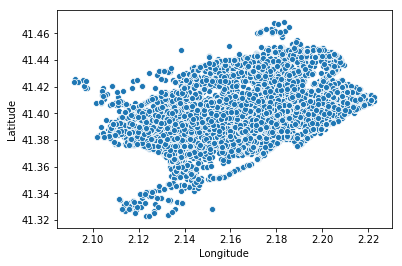

In [79]:
# scatterplot of points
#lat = x
#long = y
ax = sns.scatterplot(x='Longitude',y='Latitude',data=acc)


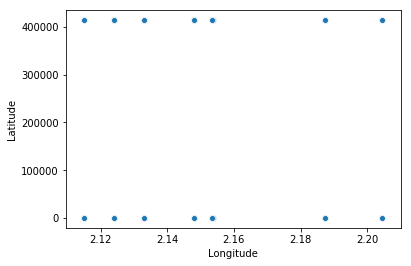

In [80]:
ax = sns.scatterplot(x='Longitude',y='Latitude',data=AQ)


In [81]:
unemployment = pd.read_csv('barcelona-data-sets/unemployment.csv')

In [82]:
g = unemployment.groupby('District Name')
g.groups.keys()

dict_keys(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'No consta', 'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi'])

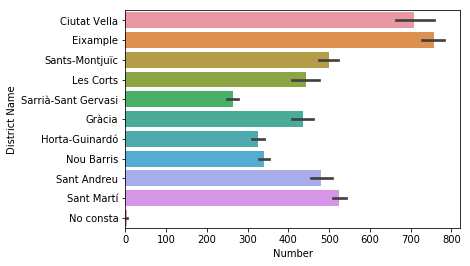

In [83]:
ax = sns.barplot(x="Number", y="District Name", data=unemployment)

In [84]:
unemployment.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630


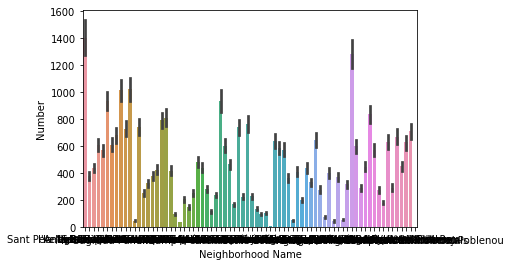

In [85]:
ax = sns.barplot(x="Neighborhood Name", y="Number", data=unemployment)

In [86]:
g = unemployment.groupby('Neighborhood Name')
g.groups.keys()
#conclusion - too many neighbor hood name, must do by district

dict_keys(['Baró de Viver', 'Can Baró', 'Can Peguera', 'Canyelles', 'Ciutat Meridiana', 'Diagonal Mar i el Front Marítim del Poblenou', 'Horta', 'Hostafrancs', 'Montbau', 'Navas', 'No consta', 'Pedralbes', 'Porta', 'Provençals del Poblenou', 'Sant Andreu', 'Sant Antoni', 'Sant Genís dels Agudells', 'Sant Gervasi - Galvany', 'Sant Gervasi - la Bonanova', 'Sant Martí de Provençals', 'Sant Pere, Santa Caterina i la Ribera', 'Sants', 'Sants - Badal', 'Sarrià', 'Torre Baró', 'Vallbona', 'Vallcarca i els Penitents', 'Vallvidrera, el Tibidabo i les Planes', 'Verdun', 'Vilapicina i la Torre Llobeta', 'el Baix Guinardó', 'el Barri Gòtic', 'el Besòs i el Maresme', 'el Bon Pastor', "el Camp d'en Grassot i Gràcia Nova", "el Camp de l'Arpa del Clot", 'el Carmel', 'el Clot', 'el Coll', 'el Congrés i els Indians', 'el Fort Pienc', 'el Guinardó', 'el Parc i la Llacuna del Poblenou', 'el Poble Sec', 'el Poblenou', 'el Putxet i el Farró', 'el Raval', 'el Turó de la Peira', "l'Antiga Esquerra de l'Eixamp

In [87]:
g = acc.groupby('District Name')
len(g.groups)
g.groups.keys()

dict_keys(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Unknown'])

In [88]:
g = unemployment.groupby('District Name')
len(g.groups)
g.groups.keys()


dict_keys(['Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'No consta', 'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi'])

 we have 10 similar districts: 
 Ciutat Vella', 
'Eixample', 
'Gràcia',
'Horta-Guinardó', 
'Les Corts', 
'Nou Barris',
'Sant Andreu', 
'Sant Martí',
Sants-Montjuic,
'Sarrià-Sant Gervasi, 
(no consta = does not include = acc[unknow]


In [89]:
!pip3 install geopy

In [90]:
import geopy

In [91]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.reverse("41.416365,2.185272") #(latitude, longitude) from unemployment or accidents
print(loc.raw)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


{'place_id': 250285559, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 662895804, 'lat': '41.4163216', 'lon': '2.18524439166667', 'display_name': '323, Carrer de Las Navas de Tolosa, Navas, Sant Martí, Barcelona, BCN, CAT, 08026, España', 'address': {'house_number': '323', 'road': 'Carrer de Las Navas de Tolosa', 'neighbourhood': 'Navas', 'suburb': 'Navas', 'city_district': 'Sant Martí', 'city': 'Barcelona', 'county': 'BCN', 'state': 'CAT', 'postcode': '08026', 'country': 'España', 'country_code': 'es'}, 'boundingbox': ['41.4162229', '41.4164105', '2.1851207', '2.1853295']}


In [92]:
render_json(loc)

{
  "place_id": 250285559,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 662895804,
  "lat": "41.4163216",
  "lon": "2.18524439166667",
  "display_name": "323, Carrer de Las Navas de Tolosa, Navas, Sant Mart\u00ed, Barcelona, BCN, CAT, 08026, Espa\u00f1a",
  "address": {
    "house_number": "323",
    "road": "Carrer de Las Navas de Tolosa",
    "neighbourhood": "Navas",
    "suburb": "Navas",
    "city_district": "Sant Mart\u00ed",
    "city": "Barcelona",
    "county": "BCN",
    "state": "CAT",
    "postcode": "08026",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.4162229",
    "41.4164105",
    "2.1851207",
    "2.1853295"
  ]
}


In [93]:
print(loc.raw["address"]["city_district"])

Sant Martí


In [94]:
AQ.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [108]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.reverse("41.3788,2.1331") #(latitude, longitude) from unemployment or accidents
print(loc.raw["address"])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


{'estate_agent': 'Promova', 'road': 'Carrer de Joan Güell', 'suburb': 'Sants', 'city_district': 'les Corts', 'city': 'Barcelona', 'county': 'BCN', 'state': 'CAT', 'postcode': '08014', 'country': 'España', 'country_code': 'es'}


In [107]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
Station         5744 non-null object
Air Quality     5744 non-null object
Longitude       5744 non-null float64
Latitude        5744 non-null float64
O3 Hour         4268 non-null object
O3 Quality      4268 non-null object
O3 Value        4101 non-null float64
NO2 Hour        5689 non-null object
NO2 Quality     5689 non-null object
NO2 Value       5460 non-null float64
PM10 Hour       3722 non-null object
PM10 Quality    3722 non-null object
PM10 Value      3647 non-null float64
Generated       5744 non-null object
Date Time       5744 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


In [ ]:
AQ["Latitude"]

In [97]:
d = []

In [106]:
for index, row in AQ.iterrows():
    #print(row['Latitude'], row['Longitude'])
    geolocator = Nominatim()
    loc = geolocator.reverse(row['Latitude'],row['Longitude']) #(latitude, longitude)
    render_json(loc)
    print(loc.raw["address"])
#loop through each long,lat pair 
#find district name with geolocator
#append to dictionary
#find how many districts


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


{
  "place_id": 13619798,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241982017,
  "lat": "41.435215",
  "lon": "-0.001508",
  "display_name": "La Plana, Pe\u00f1alba, Los Monegros, Huesca, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "La Plana",
    "village": "Pe\u00f1alba",
    "county": "Los Monegros",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.415215",
    "41.455215",
    "-0.021508",
    "0.018492"
  ]
}
{'locality': 'La Plana', 'village': 'Peñalba', 'county': 'Los Monegros', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesc

{
  "place_id": 13511405,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1242140846,
  "lat": "41.3768252",
  "lon": "-0.0068303",
  "display_name": "Valdurrios, Caspe, Zaragoza, Arag\u00f3n, Espa\u00f1a",
  "address": {
    "locality": "Valdurrios",
    "town": "Caspe",
    "county": "Zaragoza",
    "state": "Arag\u00f3n",
    "country": "Espa\u00f1a",
    "country_code": "es"
  },
  "boundingbox": [
    "41.3568252",
    "41.3968252",
    "-0.0268303",
    "0.0131697"
  ]
}
{'locality': 'Valdurrios', 'town': 'Caspe', 'county': 'Zaragoza', 'state': 'Aragón', 'country': 'España', 'country_code': 'es'}
{
  "place_id": 13578739,
  "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
  "osm_type": "node",
  "osm_id": 1241979715,
  "lat": "41.3878241",
  "lon": "-0.0022551",
  "display_name": "Val de Orencio, Fraga, Bajo Cinca / Baix Cinca, Huesca, Arag\u00f3n, Espa\u00f1a",


GeocoderTimedOut: Service timed out

[]

In [35]:
AQ[0:10]

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
5,Barcelona - Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,1541027104
6,Barcelona - Poblenou,Good,2.2045,41.4039,NaN,NaN,NaN,23h,Good,86.0,23h,Good,32.0,01/11/2018 0:00,1541027104
7,Barcelona - Observ Fabra,Good,2.1239,41.4183,23h,Good,58.0,23h,Good,3.0,23h,Good,25.0,01/11/2018 0:00,1541027104
8,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,62.0,NaN,NaN,NaN,01/11/2018 1:00,1541030725
9,Barcelona - Eixample,Good,2.1538,41.3853,0h,Good,6.0,0h,Good,80.0,1h,Good,35.0,01/11/2018 1:00,1541030725


# how to correlate features
Same District
Same date (at the very least) 
- unemployment is only by year and month
- air quality is only by m/d/y 
- # accidents is by m d no year (year is ONLY 2017) 
- aq and acc can be ampped by district and time


In [1]:
# time series 
# regression (mean squared)
# % that the # of accidnets will be > 5 for example 
# or greater than the mean PER district

# Models

In [ ]:
# Random Forest
# ARIMA
# LSTM

# Evaluation

In [ ]:
#mean squared error